# TITANIC SURVIVOR DATASET ANALYSIS
### Exploratory Data Analysis

https://www.kaggle.com/c/titanic/data?select=gender_submission.csv

In [56]:
#!pip install pandas_profiling --user

In [57]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import math
import seaborn as sns

In [58]:
input_path='./../input/'
train_name="train.csv"
test_name="test.csv"

In [59]:
train_df=pd.read_csv(input_path+train_name)
test_df=pd.read_csv(input_path+test_name)

### 1. Quick overview

In [60]:
print(train_df.info())
print(train_df.columns)
train_df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [61]:
#Pandas profiling analysis
data_profiling = ProfileReport(train_df, title='Titanic survivors report', explorative=True,orange_mode=True)
data_profiling.to_widgets()

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

### Conclusions on data after first analysis
1. Survived is the variable to predict
2. Missing data: age (20% missing) and cabin (77% missing) have high levels of missing data that need to be handleled
3. SibSp, Parch and fare present high number of zeros.


### Per variable analysis
#### Pedictors
- PassengerID: is just an ID with little value for the exercise.
- __Pclass__: the ticket class (1 = 1st, 2 = 2nd, 3 = 3rd).3rd class accounted for 55%, followed by _1st class_ and finally 2nd class.
- __Name__: passenger name. This column needs further investigation and even some NLP could bring value to the model. Same surname people where sharing cabin.
- __Sex__:male (65%)/female (35%)
- __Age__: right skewed distribution but also 0 years bin is high. 117 missing values.Right _skewness of 0,39_ and _Kurtosis is 0,18_ Is this enough to approximate to a normal distribution __age~N(mu,sigma)?__ 
- __SibSp__: # of siblings / spouses aboard the Titanic. 68% of the people where traveling without siblings/spouse. "coetaneous"
- __Parch__: # of parents / children aboard the Titanic. 76% of the people where traveling without parents/children."no coetaneous"
- Ticket:ticket number. Not sure this attribute brings any value.
- __Embarked__: Port of Embarkation	(C = Cherbourg, Q = Queenstown, S = Southampton)
- __Fare__: passenger fare. Highly skewed to the right, which means that most of the fares were low,which is consistent with the % of third class passengers. There are three recors with __512.3292__ far from the next most extreme __263__.Further analysis and relation with cabins.
- __Cabin__: cabin(s) number(s). This attirbute has 77% data missing. I understand for 3rd class there was not a specific cabin assigned, but 2nd class and even 1st class poor data quality...Is there any way to fill in data? or discard?




#### Dependant variable
**Survived**: two class variable with not unbalanced class since **1 (38%)** and __0 (62%)__ .


### Features relations amoung themselves
#### Correlations
###### Pearson's correlation for linear correlation
Limitations are:
- Linear relations between __numerical variables only__
- No able to distinguis between independent and independent variables

Pclass vs. age  
Pclass vs. fare  
age vs Sib/Parch  
Sib vs Parch  

###### Phi_k correlation for linear correlation

<a href="https://phik.readthedocs.io/en/latest/#:~:text=Phi_K%20is%20a%20new%20and,categorical%2C%20ordinal%20and%20interval%20variables.">More info regarding Phi correlation</a>

Is an improvement of standard correlation coefficients. It has the following advantages:
- It works consistently between __categorical, ordinal and interval variables__
- It captures __non-linear dependency__
- It reverts to the Pearson correlation coefficient in case of a bi-variate normal input distribution

sex vs.survived  
Pclass vs Embarked  
Fare vs. Pclass  
Embarked vs. Pclass  


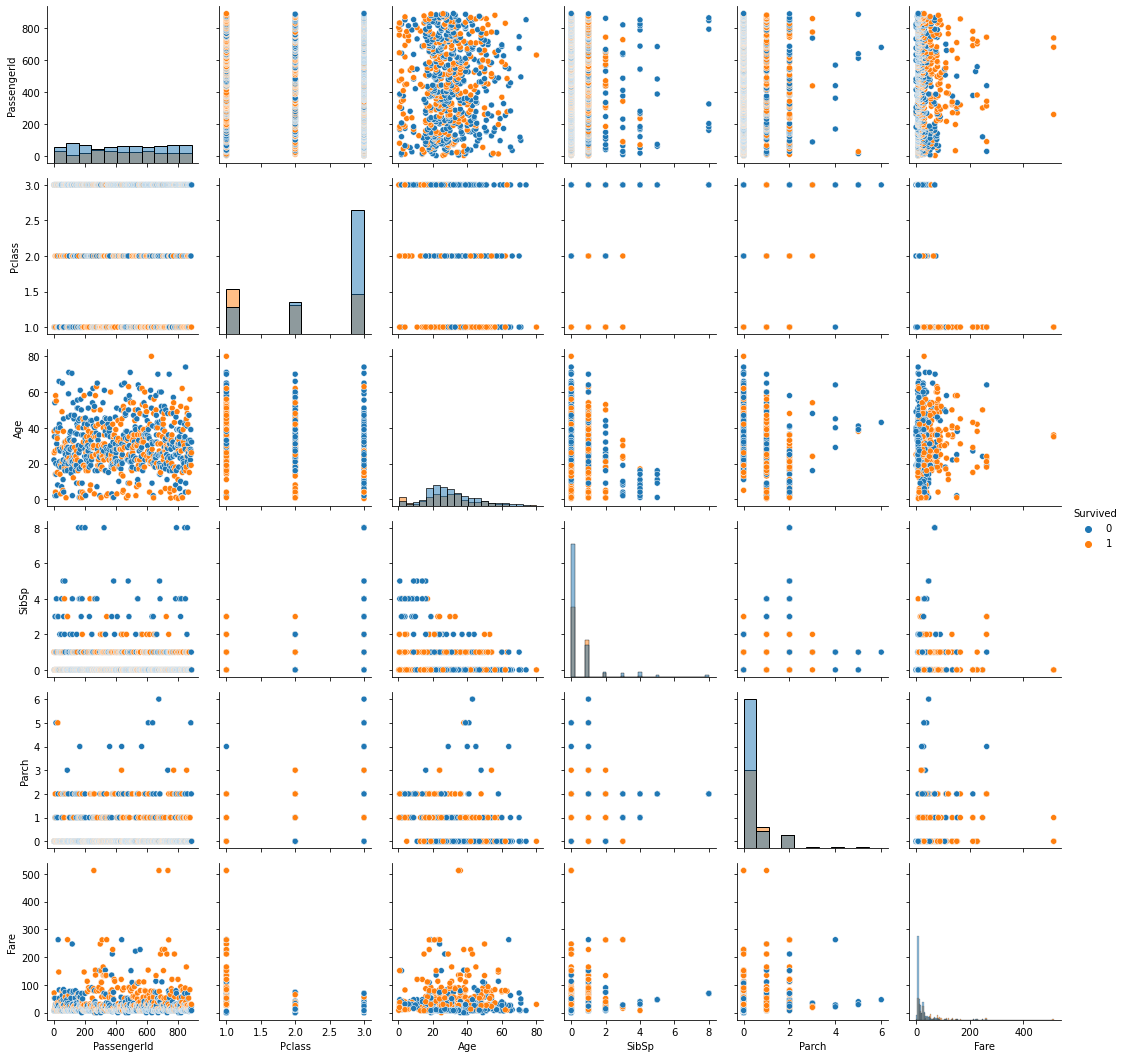

In [62]:
#https://seaborn.pydata.org/tutorial/axis_grids.html
g = sns.PairGrid(train_df, hue="Survived")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

### Relation between objective variable and predictors
How does survived correlates with predictors?
Survive vs. PClass 
Survive vs. fare
Survive vs. Sex(Phik)


#### Suvived vs. Pclass

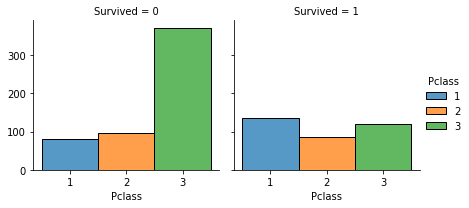

In [63]:
g = sns.FacetGrid(train_df, col='Survived',hue="Pclass")
g.map(sns.histplot, "Pclass")
g.add_legend()


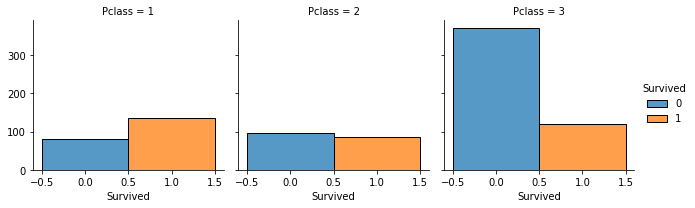

In [64]:
col_variable='Pclass'
color_variable='Survived'
x='Survived'

g = sns.FacetGrid(train_df, col=col_variable,hue=color_variable)
g.map(sns.histplot,x)
g.add_legend()

#### Suvived vs. Name

So far no NLP analysis so for this exercise, we "assume" name has no value as an explanatory variable for the variance of Survive.

#### Suvived vs. Sex

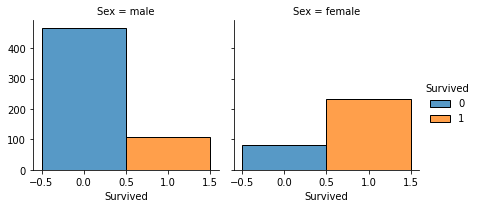

In [65]:
col_variable='Sex'
color_variable='Survived'
x='Survived'

g = sns.FacetGrid(train_df, col=col_variable,hue=color_variable)
g.map(sns.histplot,x)
g.add_legend()

Conclusion: Gender seems to bea good explanatory variable. Most male perish, in contrast, a larger proportion of female survived. The odds are againts males...

#### Suvived vs. Age

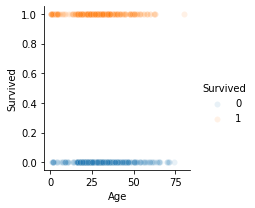

In [66]:
x_variable='Age'
y_variable='Survived'
color_variable='Survived'


g = sns.FacetGrid(train_df, hue=color_variable,margin_titles=True)
g.map(sns.scatterplot, x_variable, y_variable, alpha=.1)
g.add_legend()

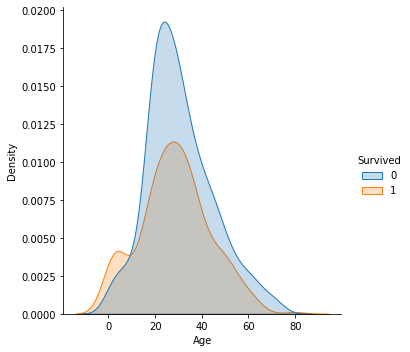

In [67]:
sns.displot(train_df, x=x_variable, hue=color_variable, kind="kde", fill=True)

Conclusion: Age itself is not a good predictor

#### Suvived vs. SibSp

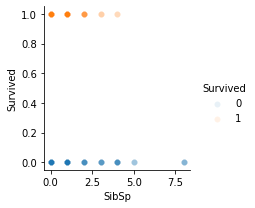

In [68]:
x_variable='SibSp'
y_variable='Survived'
color_variable='Survived'


g = sns.FacetGrid(train_df, hue=color_variable,margin_titles=True)
g.map(sns.scatterplot, x_variable, y_variable, alpha=.1)
g.add_legend()

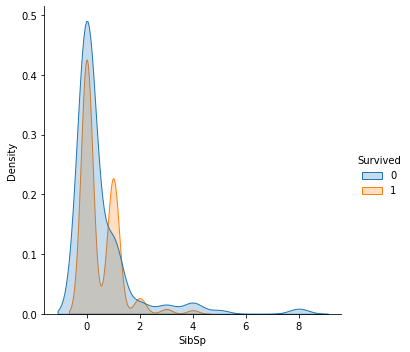

In [69]:
sns.displot(train_df, x=x_variable, hue=color_variable, kind="kde", fill=True)

Conclusion: seems a bit like the more people travel together, the less change to suvived. But not clear relation

#### Suvived vs. Parch

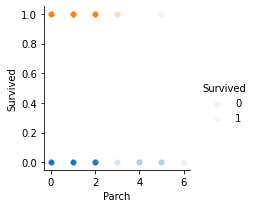

In [70]:
x_variable='Parch'
y_variable='Survived'
color_variable='Survived'


g = sns.FacetGrid(train_df, hue=color_variable,margin_titles=True)
g.map(sns.scatterplot, x_variable, y_variable, alpha=.1)
g.add_legend()

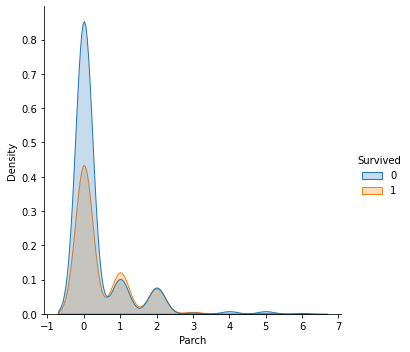

In [71]:
sns.displot(train_df, x=x_variable, hue=color_variable, kind="kde", fill=True)

Conclusion: not clear conclusion

#### Suvived vs. Embarked

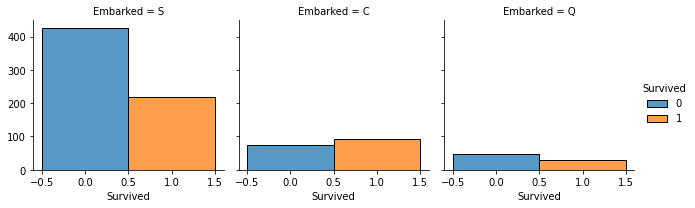

In [72]:
col_variable='Embarked'
color_variable='Survived'
x='Survived'

g = sns.FacetGrid(train_df, col=col_variable,hue=color_variable)
g.map(sns.histplot,x)
g.add_legend()

Conclusion: ---

#### Suvived vs. Fare

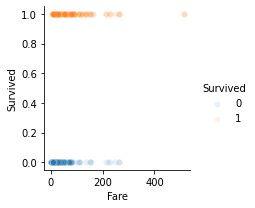

In [73]:
x_variable='Fare'
y_variable='Survived'
color_variable='Survived'


g = sns.FacetGrid(train_df, hue=color_variable,margin_titles=True)
g.map(sns.scatterplot, x_variable, y_variable, alpha=.1)
g.add_legend()

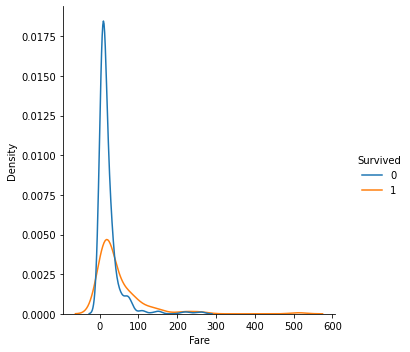

In [74]:
sns.displot(train_df, x=x_variable, hue=color_variable,kind="kde")

Conclusion: Seems like for a fare range it was more likely to survive

#### Suvived vs. Cabin

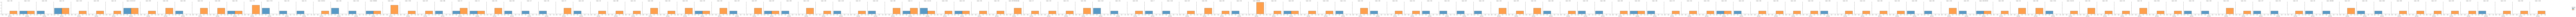

In [75]:
col_variable='Cabin'
color_variable='Survived'
x='Survived'


g = sns.FacetGrid(train_df, col=col_variable,hue=color_variable)
g.map(sns.histplot,x)
g.add_legend()

Conclusion: ---

### Data cleanising
#### Empty values


#### Age

In order to deal with empty values in age, there are 3 approaches:
1. Understand __age distribution__ and use average,median,mode,fixed,...)
2. Consider missing data as a value/category
2. Estimate age with a __linear regression__ 

In [ ]:
from scipy inport stats

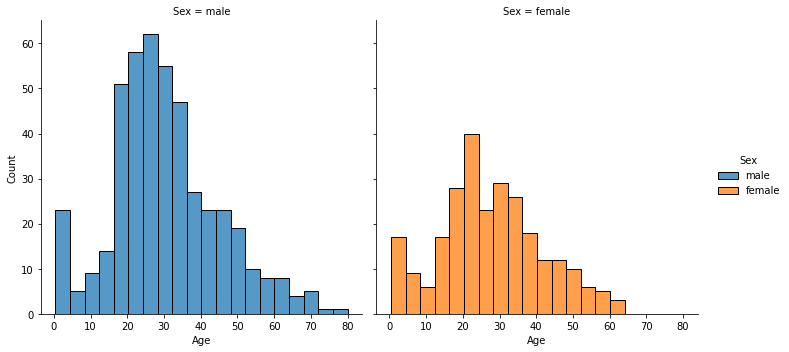

In [89]:
#Age
#Plot age distribution by sex
sns.displot(train_df,x='Age', col='Sex',hue='Sex')

#What type of distribution
male_age_dist=train_df.loc[train_df['Sex']=='male','Age']
female_age_dist=train_df.loc[train_df['Sex']=='female','Age']
#Fitting distribution to data
#https://glowingpython.blogspot.com/2012/07/distribution-fitting-with-scipy.html
    
#Calculate distribution parameters

#### Cabin

### New variables
- Number of cabins booked
- is_family: those who have at least one Sib AND at least 1 Parch (0/1)
cabin letter

In [47]:
%%time
#IS_FAMILY
conditions = [
    (train_df['SibSp'] > 1) & (train_df['Parch'] > 1),
    (train_df['SibSp'] < 1) | (train_df['Parch'] < 1)]
choices = [1,0]

train_df['IS_FAMILY'] = np.select(conditions, choices, default=0)
#Slower:train_df['is_family']=train_df.apply(lambda row: 1 if ((row.SibSp> 1) and (row.Parch> 1)) else 0, axis=1)

Wall time: 0 ns


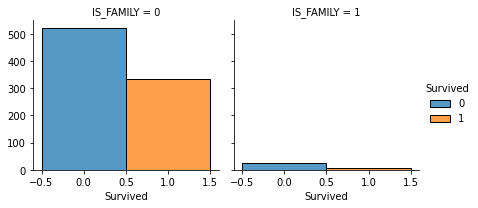

In [64]:
col_variable='IS_FAMILY'
color_variable='Survived'
x='Survived'

g = sns.FacetGrid(train_df, col=col_variable,hue=color_variable)
g.map(sns.histplot,x)
g.add_legend()

train_df

Wall time: 24 ms


### Features processing required for the model

#Logistic regresion
 , 'Cabin',
#1. Decission for continuous variables
    ['Fare']

#2. Decission for discrete variables
    ['Age','SibSp','Parch']

#3. Decission for categorical variables
    ['Pclass','Sex','Embarked']

#4. Decission for string variables
    ['Name']

#5. Flag variables
    ['IS_FAMILY']
    
#6. Not used
    ['PassengerId','Ticket']

In [90]:
#Feature selection
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

C:\Users\breog\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:34: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ._gradient_boosting import predict_stages
C:\Users\breog\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:34: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ._gradient_boosting import predict_s

In [101]:
x=train_df.drop(labels=['Survived','Name'],axis='columns')
y=train_df['Survived']

In [102]:
x.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,3,male,35.0,0,0,373450,8.0500,NaN,S


In [103]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [104]:
clf=ExtraTreesClassifier(n_estimators=50)
clf_fit=clf.fit(x,y)

ValueError: could not convert string to float: 'male'

In [ ]:
model=SelectFromModel(clf_fit,prefit=True)
X_new=model.transform(x)
X_new.shape

In [95]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
